# DataQuest Guided Project (201)
---
## Star Wars Survey: Does America Realize That “The Empire Strikes Back” Is The Best Movie Of The Franchise?

#### The data was collected by FiveThirtyEight and is available on their [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) page:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read file
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1', header=None)

In [3]:
#preview dataframe
star_wars.head(5)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,RespondentID,Have you seen any of the 6 films in the Star W...,Do you consider yourself to be a fan of the St...,Which of the following Star Wars films have yo...,NaN,NaN,NaN,NaN,NaN,Please rank the Star Wars films in order of pr...,...,NaN,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Ex...,Do you consider yourself to be a fan of the St...,Gender,Age,Household Income,Education,Location (Census Region)
1,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
2,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


#### First 2 rows are headers, this is why it's a good idea to combine them into one

In [4]:
#loop through the first header column, replace blanks with values from previous filled cell
first_header_row = star_wars.iloc[0]

for n, i in enumerate(first_header_row):
    if pd.isnull(i):
        first_header_row[n] = first_header_row[n-1]

In [5]:
second_header_row = star_wars.iloc[1]
#replace nan in second header row with 'Response' following convention of the file
second_header_row[0] = 'Response'

In [6]:
#combine header rows into one, separated with a dash
headers = first_header_row + '-' + second_header_row

In [7]:
#make headers less wordy
headers = headers.str.replace('-Response', '')
headers = headers.str.replace('Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.-Star Wars: ', 'Rank-')
headers = headers.str.replace('Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.-', 'Opinion-')
headers = headers.str.replace('Do you consider yourself to be a fan', 'Fan')
headers = headers.str.replace('Which of the following Star Wars films have you seen? Please select all that apply.-Star Wars: ', 'Seen ', regex=False)

In [8]:
#view updated headers - looks better
for i in headers:
    print(i)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Fan of the Star Wars film franchise?
Seen Episode I  The Phantom Menace
Seen Episode II  Attack of the Clones
Seen Episode III  Revenge of the Sith
Seen Episode IV  A New Hope
Seen Episode V The Empire Strikes Back
Seen Episode VI Return of the Jedi
Rank-Episode I  The Phantom Menace
Rank-Episode II  Attack of the Clones
Rank-Episode III  Revenge of the Sith
Rank-Episode IV  A New Hope
Rank-Episode V The Empire Strikes Back
Rank-Episode VI Return of the Jedi
Opinion-Han Solo
Opinion-Luke Skywalker
Opinion-Princess Leia Organa
Opinion-Anakin Skywalker
Opinion-Obi Wan Kenobi
Opinion-Emperor Palpatine
Opinion-Darth Vader
Opinion-Lando Calrissian
Opinion-Boba Fett
Opinion-C-3P0
Opinion-R2 D2
Opinion-Jar Jar Binks
Opinion-Padme Amidala
Opinion-Yoda
Which character shot first?
Are you familiar with the Expanded Universe?
Fan of the Expanded Universe???
Fan of the Star Trek franchise?
Gender
Age
Household Income
Educati

In [9]:
#assign new column headers
star_wars.columns = headers

In [10]:
#delete first two rows
star_wars.drop([0, 1], axis=0, inplace=True)

In [11]:
#check to make sure the new header is in place
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Fan of the Star Wars film franchise?,Seen Episode I The Phantom Menace,Seen Episode II Attack of the Clones,Seen Episode III Revenge of the Sith,Seen Episode IV A New Hope,Seen Episode V The Empire Strikes Back,Seen Episode VI Return of the Jedi,Rank-Episode I The Phantom Menace,...,Opinion-Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Fan of the Expanded Universe???,Fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
2,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
4,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [12]:
#check for any NaNs in RespondentID column
any(star_wars['RespondentID'].isnull())

False

In [13]:
#convert some columns to boolean
convert_to_bool = {'No': False, 
                   np.nan: False,
                   'Yes': True,
                   'Star Wars: Episode I  The Phantom Menace': True,
                   'Star Wars: Episode II  Attack of the Clones': True,
                   'Star Wars: Episode III  Revenge of the Sith': True,
                   'Star Wars: Episode IV  A New Hope': True,
                   'Star Wars: Episode V The Empire Strikes Back': True,
                   'Star Wars: Episode VI Return of the Jedi': True
                  }
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
    star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(convert_to_bool)
star_wars['Fan of the Star Wars film franchise?'] = \
    star_wars['Fan of the Star Wars film franchise?'].map(convert_to_bool)
star_wars['Seen Episode I  The Phantom Menace'] = star_wars['Seen Episode I  The Phantom Menace'].map(convert_to_bool)
star_wars['Seen Episode II  Attack of the Clones'] = star_wars['Seen Episode II  Attack of the Clones'].map(convert_to_bool)
star_wars['Seen Episode III  Revenge of the Sith'] = star_wars['Seen Episode III  Revenge of the Sith'].map(convert_to_bool)
star_wars['Seen Episode IV  A New Hope'] = star_wars['Seen Episode IV  A New Hope'].map(convert_to_bool)
star_wars['Seen Episode V The Empire Strikes Back'] = star_wars['Seen Episode V The Empire Strikes Back'].map(convert_to_bool)
star_wars['Seen Episode VI Return of the Jedi'] = star_wars['Seen Episode VI Return of the Jedi'].map(convert_to_bool)

In [14]:
#this check shows that columns converted to bool data type with no missing values
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 2 to 1187
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   RespondentID                                                  1186 non-null   object
 1   Have you seen any of the 6 films in the Star Wars franchise?  1186 non-null   bool  
 2   Fan of the Star Wars film franchise?                          1186 non-null   bool  
 3   Seen Episode I  The Phantom Menace                            1186 non-null   bool  
 4   Seen Episode II  Attack of the Clones                         1186 non-null   bool  
 5   Seen Episode III  Revenge of the Sith                         1186 non-null   bool  
 6   Seen Episode IV  A New Hope                                   1186 non-null   bool  
 7   Seen Episode V The Empire Strikes Back                        1186 non-null   

In [15]:
#convert ranking columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
#convert opinion columns to a numeric score on a scale from Very unfavorably = 0 to Very favorably = 4
convert_to_int = {'Very unfavorably': 0,
                  'Somewhat unfavorably': 1,
                  'Neither favorably nor unfavorably (neutral)': 2,
                  'Somewhat favorably': 3,
                  'Very favorably': 4,
                  'Unfamiliar (N/A)': np.nan}

opinion_columns = [col for col in star_wars.columns if col.startswith('Opinion')]

for col in opinion_columns:
    star_wars[col] = star_wars[col].map(convert_to_int)

In [17]:
#this check shows that columns converted to numeric successfully
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 2 to 1187
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   RespondentID                                                  1186 non-null   object 
 1   Have you seen any of the 6 films in the Star Wars franchise?  1186 non-null   bool   
 2   Fan of the Star Wars film franchise?                          1186 non-null   bool   
 3   Seen Episode I  The Phantom Menace                            1186 non-null   bool   
 4   Seen Episode II  Attack of the Clones                         1186 non-null   bool   
 5   Seen Episode III  Revenge of the Sith                         1186 non-null   bool   
 6   Seen Episode IV  A New Hope                                   1186 non-null   bool   
 7   Seen Episode V The Empire Strikes Back                        1186 no

#### After inspecting the data further, it appears that survey takers were able to rank the movies even without seeing them! You can see two examples of this below, where rankings for episodes not seen seem random

In [18]:
star_wars[star_wars.columns[3:15]].iloc[2]

Seen Episode I  The Phantom Menace         True
Seen Episode II  Attack of the Clones      True
Seen Episode III  Revenge of the Sith      True
Seen Episode IV  A New Hope               False
Seen Episode V The Empire Strikes Back    False
Seen Episode VI Return of the Jedi        False
Rank-Episode I  The Phantom Menace            1
Rank-Episode II  Attack of the Clones         2
Rank-Episode III  Revenge of the Sith         3
Rank-Episode IV  A New Hope                   4
Rank-Episode V The Empire Strikes Back        5
Rank-Episode VI Return of the Jedi            6
Name: 4, dtype: object

In [19]:
star_wars[star_wars.columns[3:15]].iloc[173]

Seen Episode I  The Phantom Menace        False
Seen Episode II  Attack of the Clones     False
Seen Episode III  Revenge of the Sith     False
Seen Episode IV  A New Hope                True
Seen Episode V The Empire Strikes Back     True
Seen Episode VI Return of the Jedi         True
Rank-Episode I  The Phantom Menace            4
Rank-Episode II  Attack of the Clones         5
Rank-Episode III  Revenge of the Sith         6
Rank-Episode IV  A New Hope                   1
Rank-Episode V The Empire Strikes Back        3
Rank-Episode VI Return of the Jedi            2
Name: 175, dtype: object

#### I am not sure what the reason for this was but it seems like it would introduce a lot of noise into the data so I will replace rankings with NaNs where a movie was not actually seen

In [20]:
star_wars.loc[star_wars['Seen Episode I  The Phantom Menace'] == False, 'Rank-Episode I  The Phantom Menace'] = np.nan
star_wars.loc[star_wars['Seen Episode II  Attack of the Clones'] == False, 'Rank-Episode II  Attack of the Clones'] = np.nan
star_wars.loc[star_wars['Seen Episode III  Revenge of the Sith'] == False, 'Rank-Episode III  Revenge of the Sith'] = np.nan
star_wars.loc[star_wars['Seen Episode V The Empire Strikes Back'] == False, 'Rank-Episode IV  A New Hope'] = np.nan
star_wars.loc[star_wars['Seen Episode V The Empire Strikes Back'] == False, 'Rank-Episode V The Empire Strikes Back'] = np.nan
star_wars.loc[star_wars['Rank-Episode VI Return of the Jedi'] == False, 'Rank-Episode VI Return of the Jedi'] = np.nan

### Visualize Average Ranking of a Star Wars Film

In [21]:
avg_ranks = star_wars[star_wars.columns[9:15]].mean().round(2)

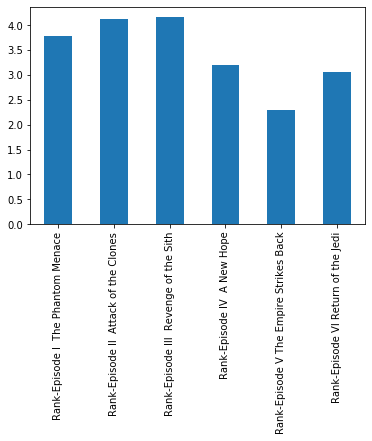

In [22]:
avg_ranks.plot(kind='bar')

We can see from our analysis that survey takers rank "Episode V: The Empire Strikes Back" the highest on average. If I remember correctly, that movie did not end well for the rebels, and thus generated a lot of hype in anticipation of Episode VI. My quick take on why the 3 movies that came out decades ago tend to be ranked higher:

* Novelty of special effects and space travel at the time
* The Space Program being featured more prominently in the mainstream media at the time
* Nostalgia for the 'good ol' days'
* Being spoiled by a wave of superhero movies in 2000s

Serious movie critics and pop culture historians probably have additional reasons, or may be in disagreement with me.

### Visualize the Number of People Who Watched Each Movie

In [23]:
sum_watchers = star_wars[star_wars.columns[3:9]].sum()

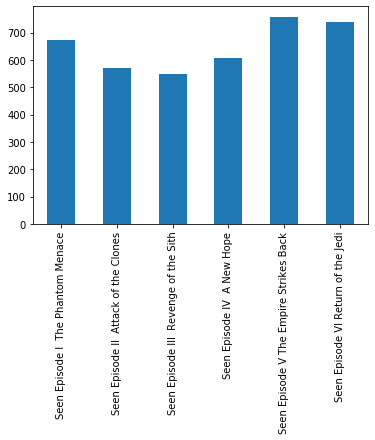

In [24]:
sum_watchers.plot(kind='bar')

It appears that the number of people who saw each episode is negatively correlated with movie rankings. This makes sense as more people tend to watch movies that are ranked higher, and excitement drops off for movies that are ranked lower. We can easily calculate the correlation below. The result is -0.88. We can also use a scatterplot which is a better way to show correlation.

In [25]:
corr_df = pd.DataFrame(columns=['Ranks', 'Viewers'])
corr_df['Ranks'] = avg_ranks.values
corr_df['Viewers'] = sum_watchers.values

In [26]:
corr_df

,Ranks,Viewers
0,3.79,673
1,4.13,571
2,4.16,550
3,3.20,607
4,2.30,758
5,3.05,738


In [27]:
corr_df.corr()

,Ranks,Viewers
Ranks,1.000000,-0.840418
Viewers,-0.840418,1.000000


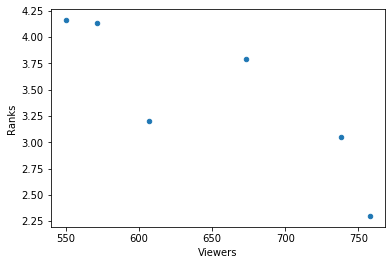

In [28]:
corr_df.plot(kind='scatter', x='Viewers', y='Ranks')

### Visualize Average Opinion Score by Character

In [29]:
avg_opinion = star_wars[opinion_columns].mean()
avg_opinion.sort_values(ascending=False, inplace=True)
print(avg_opinion)

Opinion-Han Solo                3.671990
Opinion-Obi Wan Kenobi          3.632426
Opinion-Yoda                    3.629902
Opinion-Luke Skywalker          3.580606
Opinion-R2 D2                   3.569512
Opinion-Princess Leia Organa    3.555286
Opinion-C-3P0                   3.403941
Opinion-Anakin Skywalker        2.775616
Opinion-Lando Calrissian        2.636905
Opinion-Padme Amidala           2.604615
Opinion-Darth Vader             2.479167
Opinion-Boba Fett               2.357353
Opinion-Emperor Palpatine       2.071429
Opinion-Jar Jar Binks           1.780899
dtype: float64


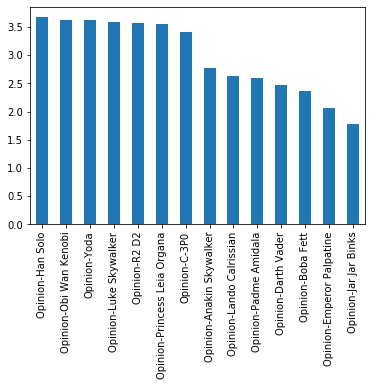

In [30]:
avg_opinion.plot(kind='bar')

Interesting findings:
* Han Solo has a higher opinion score than Yoda or Obi Wan!
* Jar Jar Binks has a lower opinion score than even Emperor Palpatine!
* Emperor Palpatine's opinion is slightly better than Neutral (2). Come on, really?

## Perform Additional Analysis on a More Granular Level

### Filter Dataframe Into Multiple Dataframes

In [31]:
#Star Wars fan and non-fans
star_wars_fans = star_wars[star_wars['Fan of the Star Wars film franchise?'] == True]
non_star_wars_fans = star_wars[star_wars['Fan of the Star Wars film franchise?'] == False]
#Star Trek fans and non-fans
star_trek_fans = star_wars[star_wars['Fan of the Star Trek franchise?'] == 'Yes']
non_star_trek_fans = star_wars[star_wars['Fan of the Star Trek franchise?'] == 'No']
#Males and Females
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
#Young and Old
under_30 = star_wars[star_wars['Age'] == '18-29']
over_60 = star_wars[star_wars['Age'] == '> 60']
#income levels
under_25k = star_wars[star_wars['Household Income'] == '$0 - $24,999']
over_150k = star_wars[star_wars['Household Income'] == '$150,000+']

#arrange the dataframes we created into a dictionary
dataframes = {'Star Wars fans': star_wars_fans,
              'Non Star Wars fans': non_star_wars_fans,
              'Star Trek fans': star_trek_fans,
              'Non Star Trek fans': non_star_trek_fans,
              'Males': males,
              'Females': females,
              'Under 30 Years of Age': under_30,
              'Over 60 Years of Age': over_60,
              'Under $25,000 Income': under_25k,
              'Over $150,000 Income': over_150k}

### Create a function to analyze a dataframe stored in a dictionary

In [32]:
def analyze(dict_key):
    print(dict_key + ', sample size: ', len(dataframes[dict_key]))
    print('\n')
    
    avg_ranks = dataframes[dict_key][dataframes[dict_key].columns[9:15]].mean()
    sum_watchers = dataframes[dict_key][dataframes[dict_key].columns[3:9]].sum()    
    
    corr_df = pd.DataFrame(columns=['Average Ranking', 'Number of Viewers'])
    corr_df['Average Ranking'] = avg_ranks.values
    corr_df['Average Ranking'] = corr_df['Average Ranking'].apply(lambda x: round(x, 2))
    corr_df['Number of Viewers'] = sum_watchers.values
    corr_df.index = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
    print(corr_df)
    
    fig1, (ax1_1, ax1_2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1_1.bar(corr_df.index, height=avg_ranks)
    ax1_1.set_title(dict_key + ': average ranking')    
    ax1_2.bar(corr_df.index, height=sum_watchers)
    ax1_2.set_title(dict_key + ': number of viewers')
    plt.show()
    
    print('\n')
    print('Correlation of viewers and rankings: ')
    print(corr_df.corr())
    print('\n')
    
    avg_opinion = dataframes[dict_key][opinion_columns].mean().round(2)
    avg_opinion.sort_values(ascending=False, inplace=True)
    print(dict_key, ' opinion of characters:')
    print(avg_opinion)
       
    fig2, (ax2_1, ax2_2) = plt.subplots(1, 2, figsize=(20, 5))
    ax2_1.scatter(x=corr_df['Number of Viewers'], y=corr_df['Average Ranking'])
    ax2_1.set_title(dict_key + ': correlation of viewers and rankings')
    ax2_2.bar(avg_opinion.index, height=avg_opinion.values)
    for tick in ax2_2.get_xticklabels():
        tick.set_rotation(90)
    ax2_2.set_title(dict_key + ': opinion of characters:')    
    plt.show() 

### Analyze Star Wars fans and non-fans

Star Wars fans, sample size:  552


             Average Ranking  Number of Viewers
Episode I               4.16                500
Episode II              4.31                463
Episode III             4.24                450
Episode IV              2.91                483
Episode V               2.29                538
Episode VI              2.83                537


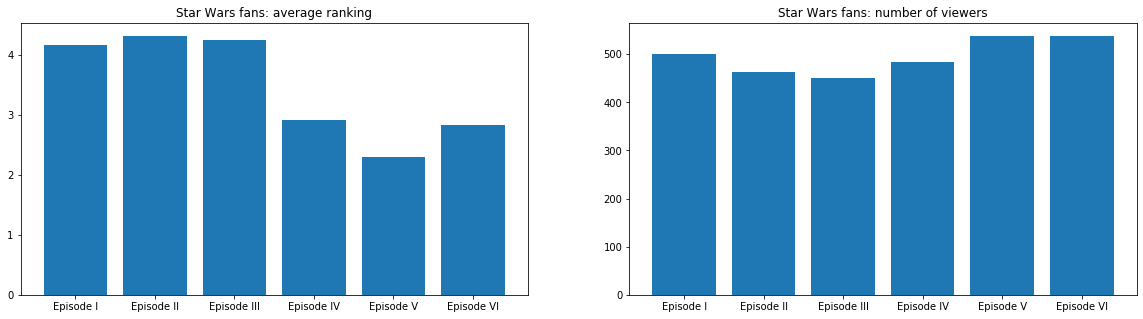



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.791251
Number of Viewers        -0.791251           1.000000


Star Wars fans  opinion of characters:
Opinion-Han Solo                3.84
Opinion-Yoda                    3.78
Opinion-Obi Wan Kenobi          3.77
Opinion-Luke Skywalker          3.70
Opinion-Princess Leia Organa    3.69
Opinion-R2 D2                   3.68
Opinion-C-3P0                   3.52
Opinion-Anakin Skywalker        2.83
Opinion-Lando Calrissian        2.76
Opinion-Darth Vader             2.69
Opinion-Padme Amidala           2.68
Opinion-Boba Fett               2.45
Opinion-Emperor Palpatine       2.10
Opinion-Jar Jar Binks           1.68
dtype: float64


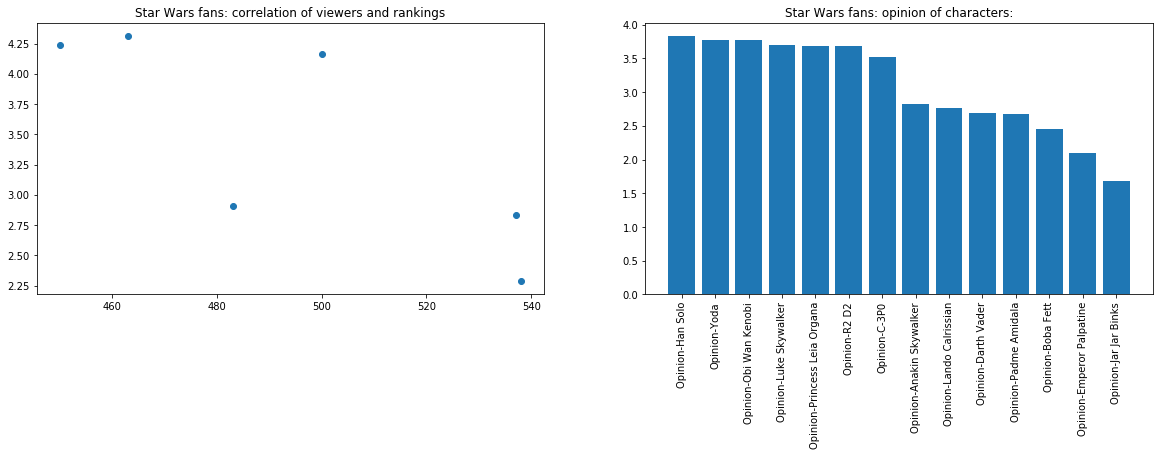

In [33]:
#Analyze Star Wars fans
analyze('Star Wars fans')

Non Star Wars fans, sample size:  634


             Average Ranking  Number of Viewers
Episode I               2.72                173
Episode II              3.33                108
Episode III             3.77                100
Episode IV              3.91                124
Episode V               2.32                220
Episode VI              3.47                201


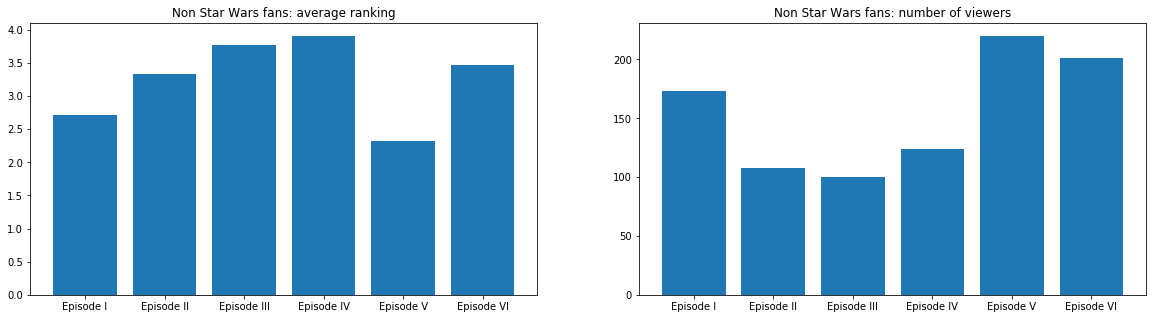



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.719675
Number of Viewers        -0.719675           1.000000


Non Star Wars fans  opinion of characters:
Opinion-Obi Wan Kenobi          3.35
Opinion-R2 D2                   3.34
Opinion-Luke Skywalker          3.34
Opinion-Yoda                    3.33
Opinion-Han Solo                3.33
Opinion-Princess Leia Organa    3.29
Opinion-C-3P0                   3.17
Opinion-Anakin Skywalker        2.64
Opinion-Padme Amidala           2.39
Opinion-Lando Calrissian        2.28
Opinion-Boba Fett               2.12
Opinion-Darth Vader             2.07
Opinion-Jar Jar Binks           2.02
Opinion-Emperor Palpatine       1.99
dtype: float64


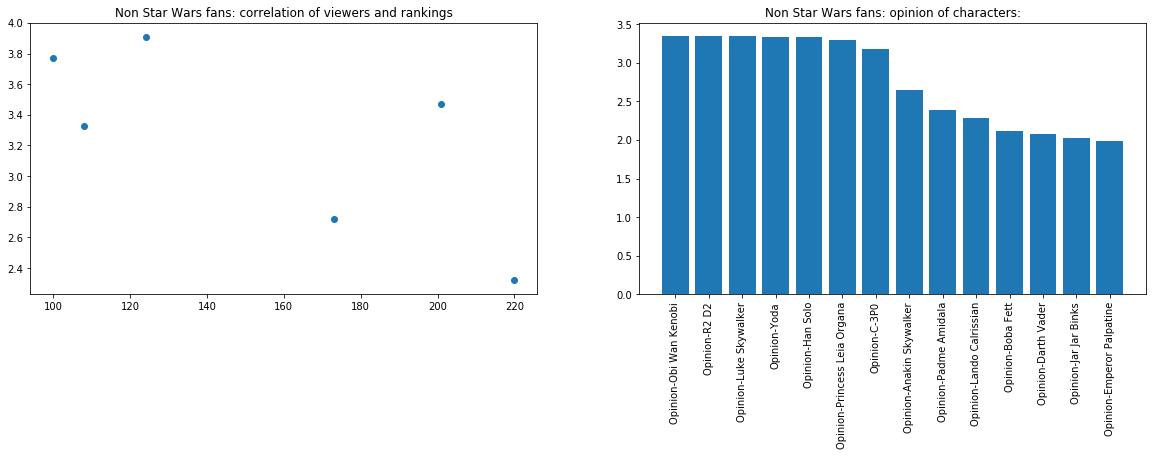

In [34]:
#Analyze non Star Wars fans
analyze('Non Star Wars fans')

After analyzing Star Wars fans and non-fans, these are some interesting findings:
* Fans rank episode V at (2.29), nearly identical to non fans (2.32)
* Non fans rank episode I at (2.72). Fans rank episode I at (4.16) 
* Almost all fans have seen each episode with little variation between episodes
* At most about a third of non fans have seen any given Star Wars movie, episode V being the most watched
* Han Solo ranks 1st for fans (3.84), and 5th for non fans (3.33) in opinion score

### Analyze Star Trek fans and non-fans

Star Trek fans, sample size:  427


             Average Ranking  Number of Viewers
Episode I               3.98                364
Episode II              4.24                336
Episode III             4.22                322
Episode IV              3.07                342
Episode V               2.33                397
Episode VI              2.85                396


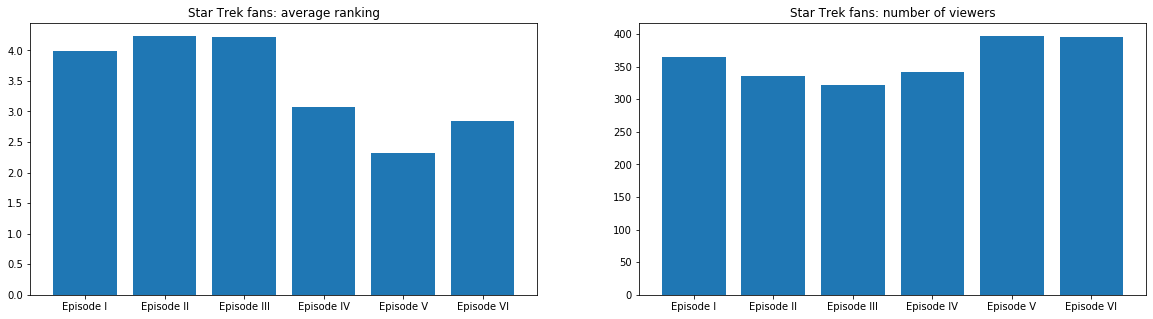



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.799845
Number of Viewers        -0.799845           1.000000


Star Trek fans  opinion of characters:
Opinion-Han Solo                3.79
Opinion-Yoda                    3.74
Opinion-Obi Wan Kenobi          3.73
Opinion-Princess Leia Organa    3.66
Opinion-Luke Skywalker          3.66
Opinion-R2 D2                   3.65
Opinion-C-3P0                   3.49
Opinion-Anakin Skywalker        2.79
Opinion-Lando Calrissian        2.69
Opinion-Padme Amidala           2.68
Opinion-Darth Vader             2.58
Opinion-Boba Fett               2.31
Opinion-Emperor Palpatine       1.99
Opinion-Jar Jar Binks           1.72
dtype: float64


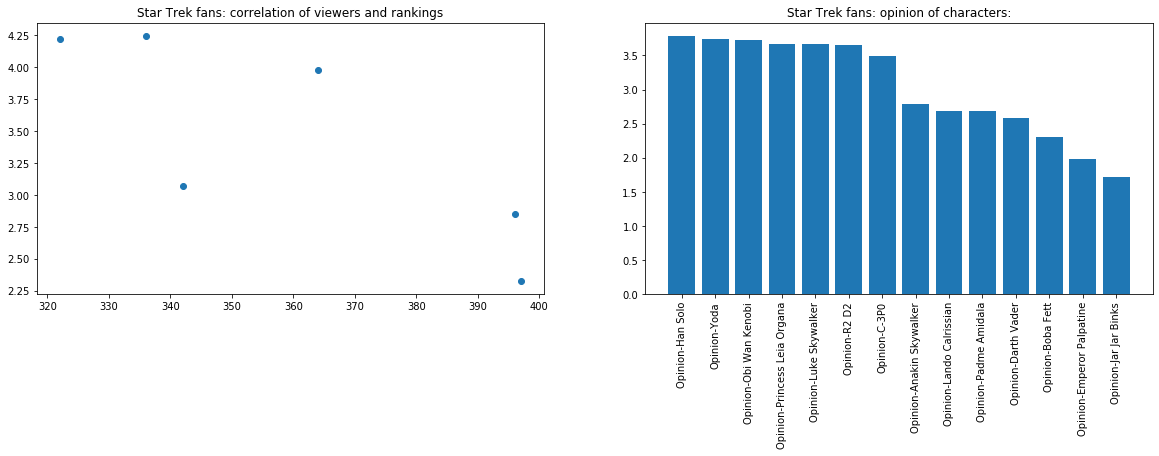

In [35]:
analyze('Star Trek fans')

Non Star Trek fans, sample size:  641


             Average Ranking  Number of Viewers
Episode I               3.54                301
Episode II              3.96                228
Episode III             4.07                221
Episode IV              3.33                258
Episode V               2.28                353
Episode VI              3.24                334


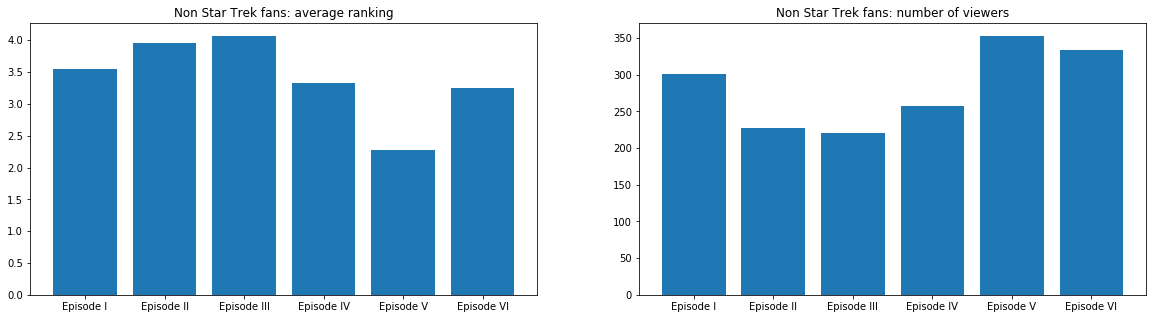



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.868977
Number of Viewers        -0.868977           1.000000


Non Star Trek fans  opinion of characters:
Opinion-Han Solo                3.55
Opinion-Obi Wan Kenobi          3.53
Opinion-Yoda                    3.51
Opinion-R2 D2                   3.49
Opinion-Luke Skywalker          3.49
Opinion-Princess Leia Organa    3.44
Opinion-C-3P0                   3.30
Opinion-Anakin Skywalker        2.75
Opinion-Lando Calrissian        2.57
Opinion-Padme Amidala           2.51
Opinion-Boba Fett               2.41
Opinion-Darth Vader             2.37
Opinion-Emperor Palpatine       2.16
Opinion-Jar Jar Binks           1.83
dtype: float64


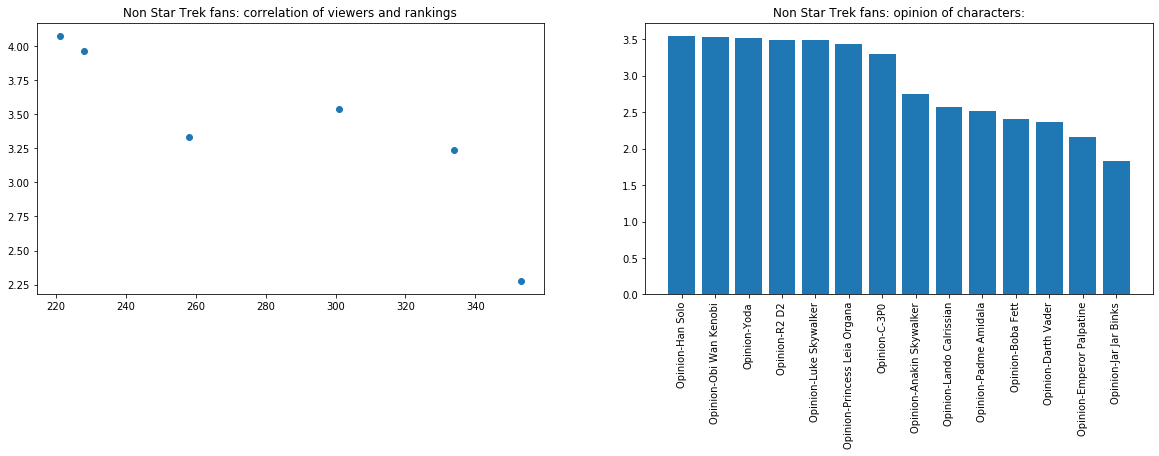

In [36]:
analyze('Non Star Trek fans')

After analyzing Star Trek fans and non-fans, these are some interesting findings:
* Star Trek fans rank episode V a little lower (2.33) than non fans (2.28)

### Analyze Males and Females

Males, sample size:  497


             Average Ranking  Number of Viewers
Episode I               4.10                361
Episode II              4.27                323
Episode III             4.14                317
Episode IV              2.92                342
Episode V               2.30                392
Episode VI              3.00                387


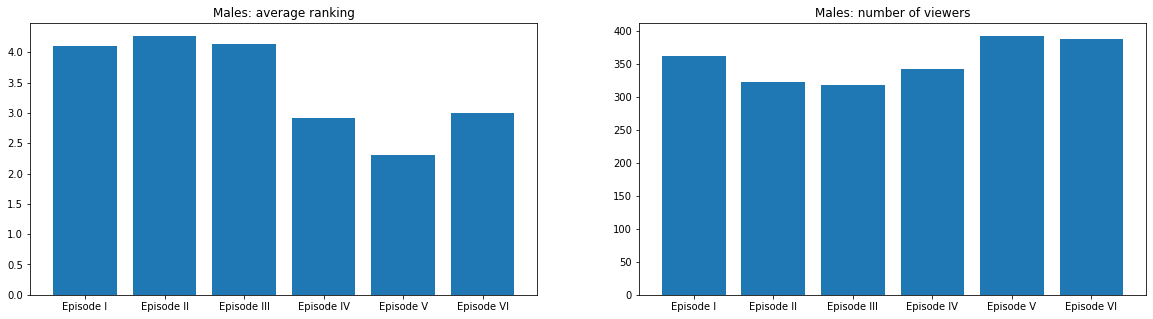



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.754509
Number of Viewers        -0.754509           1.000000


Males  opinion of characters:
Opinion-Han Solo                3.68
Opinion-Obi Wan Kenobi          3.63
Opinion-Yoda                    3.58
Opinion-Luke Skywalker          3.56
Opinion-Princess Leia Organa    3.53
Opinion-R2 D2                   3.44
Opinion-C-3P0                   3.24
Opinion-Darth Vader             2.75
Opinion-Lando Calrissian        2.65
Opinion-Anakin Skywalker        2.65
Opinion-Padme Amidala           2.53
Opinion-Boba Fett               2.49
Opinion-Emperor Palpatine       2.21
Opinion-Jar Jar Binks           1.55
dtype: float64


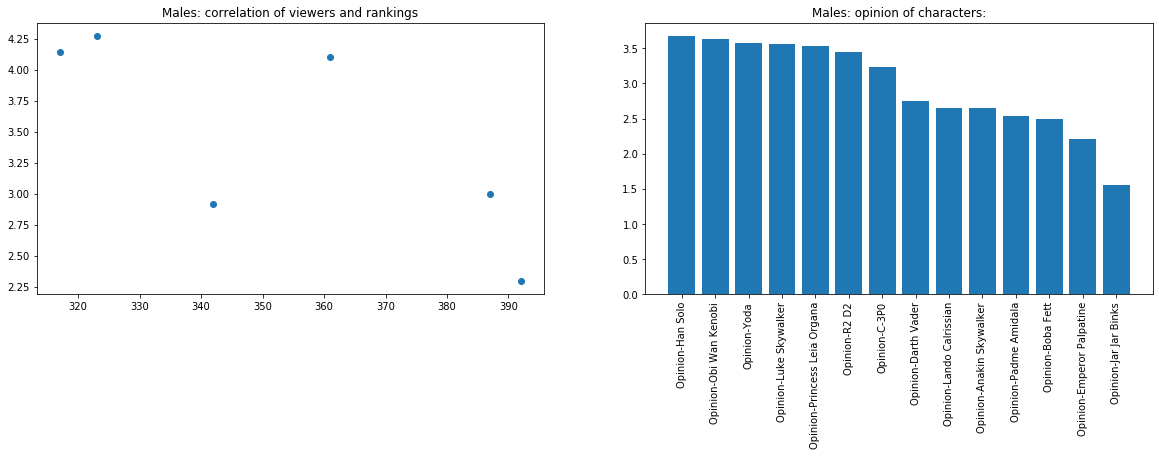

In [37]:
analyze('Males')

Females, sample size:  549


             Average Ranking  Number of Viewers
Episode I               3.42                298
Episode II              3.93                237
Episode III             4.18                222
Episode IV              3.48                255
Episode V               2.31                353
Episode VI              3.08                338


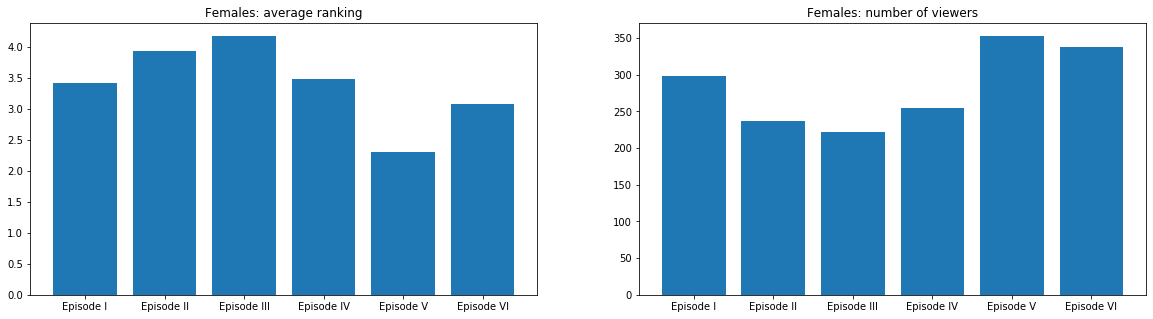



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.933821
Number of Viewers        -0.933821           1.000000


Females  opinion of characters:
Opinion-R2 D2                   3.71
Opinion-Yoda                    3.70
Opinion-Han Solo                3.68
Opinion-Obi Wan Kenobi          3.64
Opinion-Luke Skywalker          3.61
Opinion-Princess Leia Organa    3.59
Opinion-C-3P0                   3.58
Opinion-Anakin Skywalker        2.89
Opinion-Padme Amidala           2.69
Opinion-Lando Calrissian        2.61
Opinion-Darth Vader             2.20
Opinion-Boba Fett               2.18
Opinion-Jar Jar Binks           2.02
Opinion-Emperor Palpatine       1.87
dtype: float64


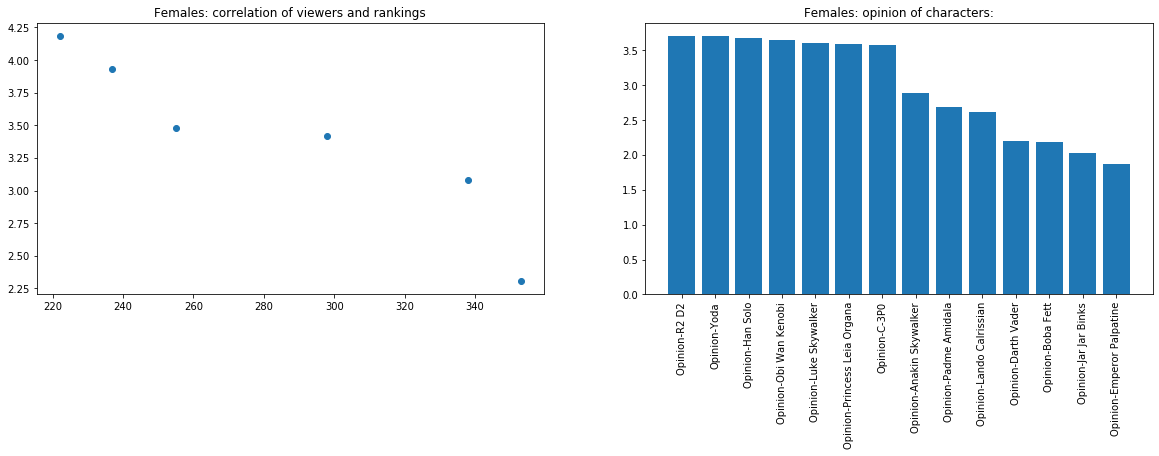

In [38]:
analyze('Females')

After analyzing males and females, these are some interesting findings:
* Males rank episode V similarly (2.3) to females (2.31).
* Higher percentage of males watched the movies as opposed to females
* Males show a 75% correlation of rankings and viewers as opposed to females at 93%
* Females' favorite character seems to be R2D2 according to opinion scores. Males rate him 6th
* Males have a better opinion of Darth Vader than Padme. For females, it's the opposite

### Analyze by Age

Under 30 Years of Age, sample size:  218


             Average Ranking  Number of Viewers
Episode I               4.16                160
Episode II              4.12                148
Episode III             3.83                145
Episode IV              2.88                152
Episode V               2.48                160
Episode VI              3.12                160


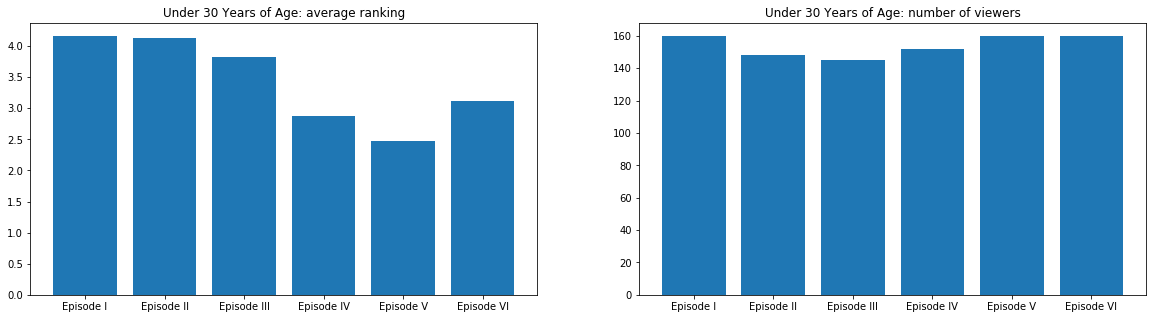



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.413114
Number of Viewers        -0.413114           1.000000


Under 30 Years of Age  opinion of characters:
Opinion-Yoda                    3.60
Opinion-Obi Wan Kenobi          3.56
Opinion-Han Solo                3.55
Opinion-R2 D2                   3.49
Opinion-Princess Leia Organa    3.39
Opinion-Luke Skywalker          3.36
Opinion-C-3P0                   3.18
Opinion-Darth Vader             2.67
Opinion-Padme Amidala           2.63
Opinion-Lando Calrissian        2.59
Opinion-Anakin Skywalker        2.58
Opinion-Boba Fett               2.52
Opinion-Emperor Palpatine       2.01
Opinion-Jar Jar Binks           1.65
dtype: float64


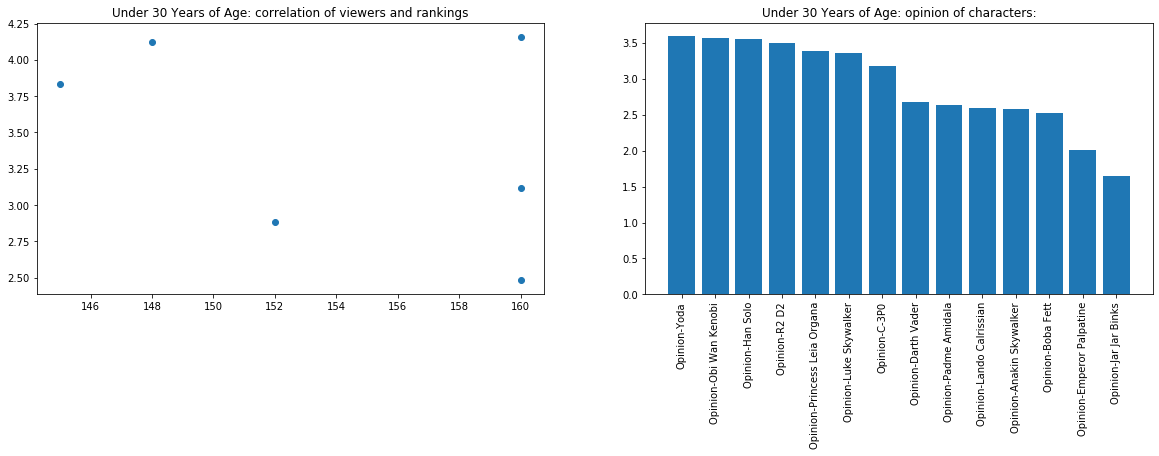

In [39]:
analyze('Under 30 Years of Age')

Over 60 Years of Age, sample size:  269


             Average Ranking  Number of Viewers
Episode I               2.80                143
Episode II              3.62                106
Episode III             4.14                100
Episode IV              3.77                104
Episode V               2.45                168
Episode VI              3.36                158


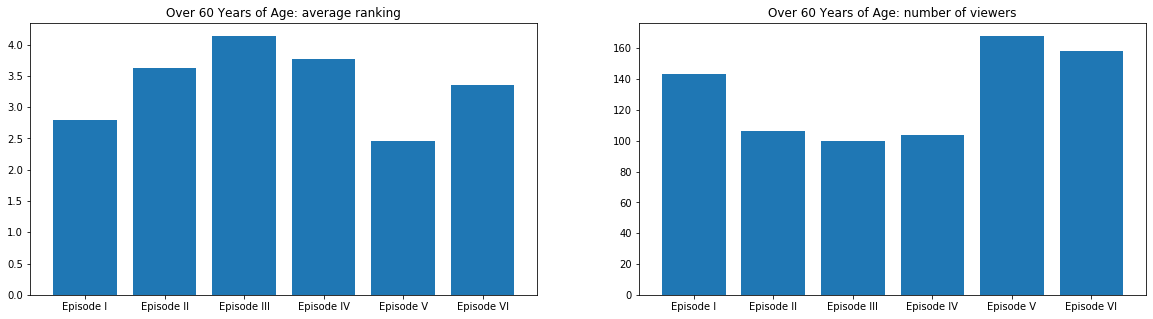



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.864505
Number of Viewers        -0.864505           1.000000


Over 60 Years of Age  opinion of characters:
Opinion-Han Solo                3.76
Opinion-Luke Skywalker          3.74
Opinion-Obi Wan Kenobi          3.73
Opinion-Princess Leia Organa    3.66
Opinion-Yoda                    3.62
Opinion-R2 D2                   3.60
Opinion-C-3P0                   3.57
Opinion-Anakin Skywalker        3.08
Opinion-Lando Calrissian        2.75
Opinion-Padme Amidala           2.57
Opinion-Darth Vader             2.33
Opinion-Jar Jar Binks           2.16
Opinion-Boba Fett               2.15
Opinion-Emperor Palpatine       2.09
dtype: float64


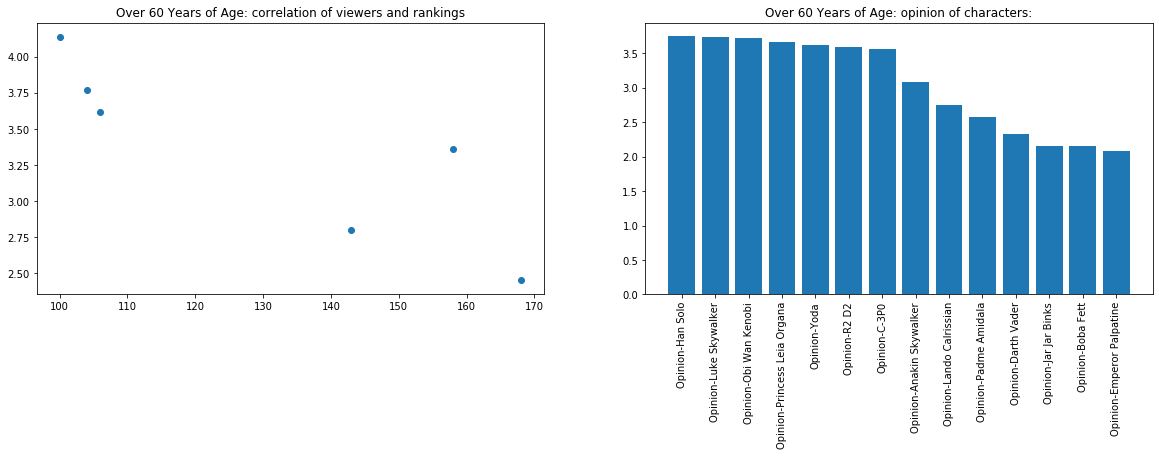

In [40]:
analyze('Over 60 Years of Age')

After analyzing young and old survey takers, these are some interesting findings:
* People under 30 rank episode V at (2.48), similar to people over 60 (2.45).
* Higher percentage of people under 30 have watched the movies as opposed to people over 60.
* Number of viewers for each episode shows little variation for people under 30.
* People over 60 rank episode I at (2.8), and it's the 2nd favorite episode for this age group. People under 30 rank episode I at (4.16) and it's their least favorite episode.
* People under 30 show a 41% correlation of rankings and viewers as opposed to people over 60 at 86%
* Yoda has the highest opinion score for people under 30.
* People under 30 have a slightly more favorable opinion of Darth Vader than Padme
* Not a single character is viewed by people over 60 below neutral (2)

### Analyze by Income Level

Under $25,000 Income, sample size:  138


             Average Ranking  Number of Viewers
Episode I               3.97                 75
Episode II              3.97                 66
Episode III             3.80                 64
Episode IV              3.14                 73
Episode V               2.60                 91
Episode VI              3.20                 86


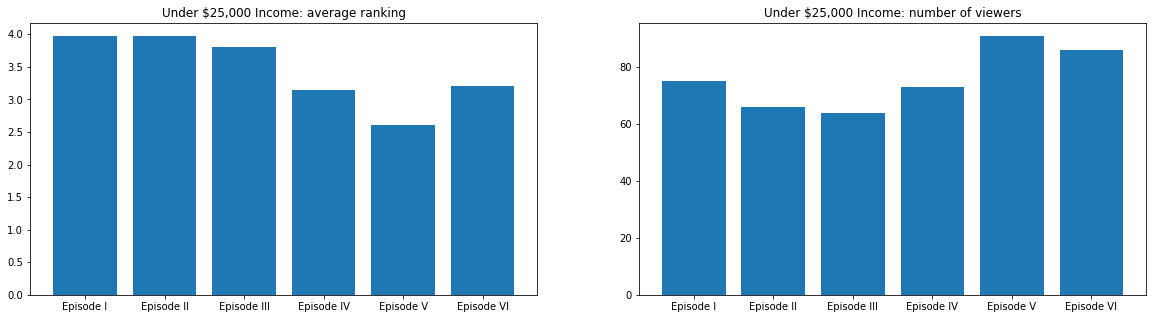



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.810858
Number of Viewers        -0.810858           1.000000


Under $25,000 Income  opinion of characters:
Opinion-Yoda                    3.61
Opinion-Han Solo                3.60
Opinion-R2 D2                   3.50
Opinion-Obi Wan Kenobi          3.47
Opinion-Luke Skywalker          3.39
Opinion-Princess Leia Organa    3.31
Opinion-C-3P0                   3.25
Opinion-Darth Vader             2.52
Opinion-Anakin Skywalker        2.48
Opinion-Lando Calrissian        2.47
Opinion-Padme Amidala           2.42
Opinion-Boba Fett               2.26
Opinion-Emperor Palpatine       1.91
Opinion-Jar Jar Binks           1.63
dtype: float64


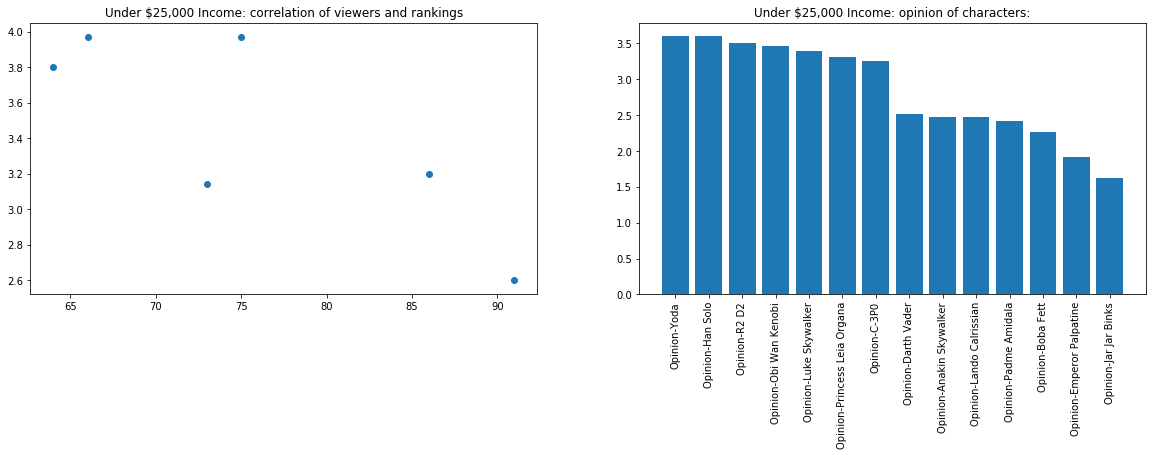

In [41]:
analyze('Under $25,000 Income')

Over $150,000 Income, sample size:  95


             Average Ranking  Number of Viewers
Episode I               3.76                 68
Episode II              4.46                 54
Episode III             4.35                 54
Episode IV              2.83                 61
Episode V               2.27                 71
Episode VI              3.03                 71


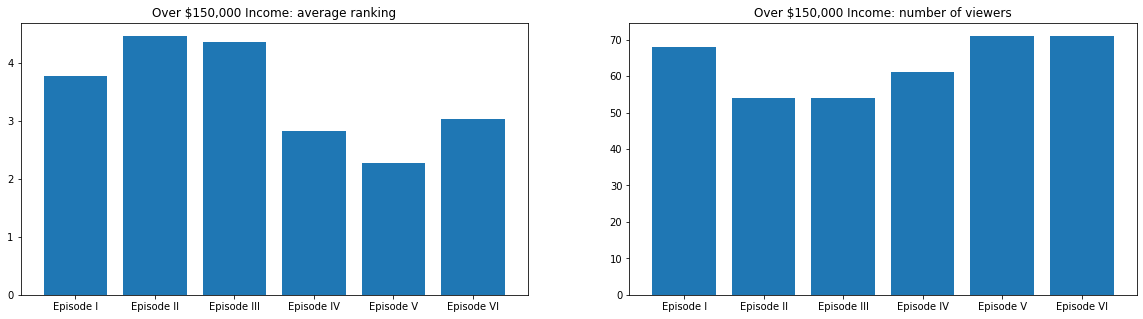



Correlation of viewers and rankings: 
                   Average Ranking  Number of Viewers
Average Ranking           1.000000          -0.773401
Number of Viewers        -0.773401           1.000000


Over $150,000 Income  opinion of characters:
Opinion-Yoda                    3.80
Opinion-Obi Wan Kenobi          3.80
Opinion-Han Solo                3.79
Opinion-Luke Skywalker          3.71
Opinion-R2 D2                   3.67
Opinion-Princess Leia Organa    3.65
Opinion-C-3P0                   3.42
Opinion-Anakin Skywalker        2.75
Opinion-Lando Calrissian        2.56
Opinion-Padme Amidala           2.55
Opinion-Darth Vader             2.45
Opinion-Boba Fett               2.33
Opinion-Emperor Palpatine       2.11
Opinion-Jar Jar Binks           1.52
dtype: float64


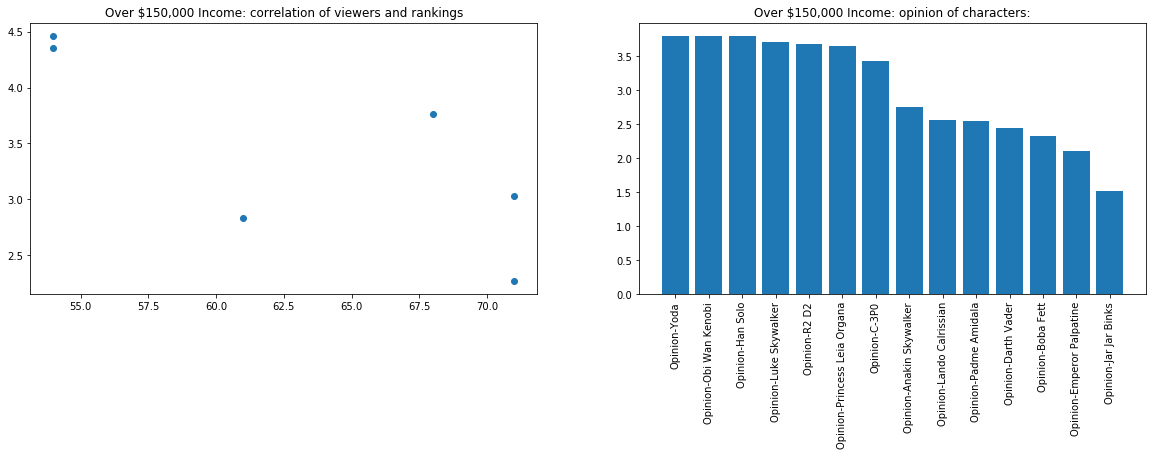

In [42]:
analyze('Over $150,000 Income')

After analyzing people with income under 25,000 USD and over 150,000 USD, these are some interesting findings:
* People with income under 25,000 USD rank episode V at (2.6)
* People with income over 150,000 USD rank episode V at (2.27)